# 1. Data read (nc file)

In [1]:
import cdms2 as cdms
import cdutil
import genutil
import MV2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from regrid2 import Regridder

var = 'pr'
data =   ['GPCP-2-3',     'TRMM-3B43v-7', 'CMAP-V1902',   'ERA-INT']
period = ['197901-201907','199801-201712','197901-201901','197901-201903']
ver = 'v20200421'

f=[]
for i in range(4):
    dir = '/p/user_pub/PCMDIobs/PCMDIobs2_clims/atmos/'+var+'/'+data[i]+'/'
    nc = var+'_mon_'+data[i]+'_BE_gn_'+period[i]+'.'+ver+'.AC.nc'
    f.append(cdms.open(dir+nc)) 


# 2. land/sea masking with original grid

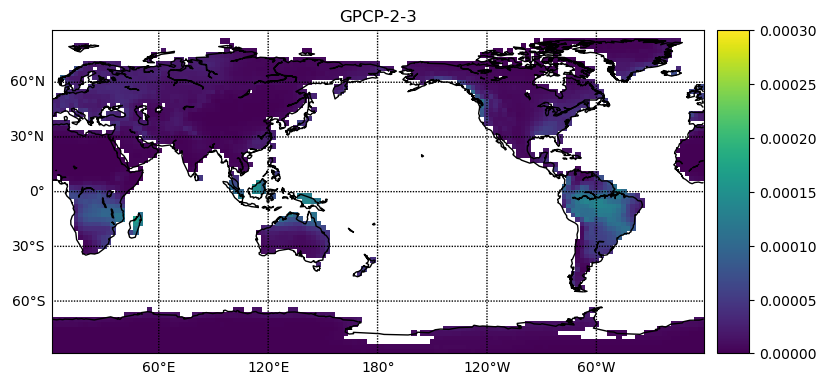

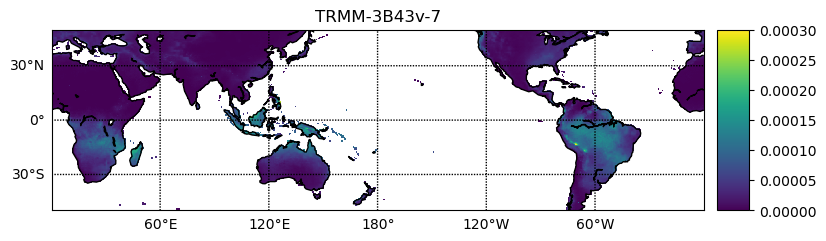

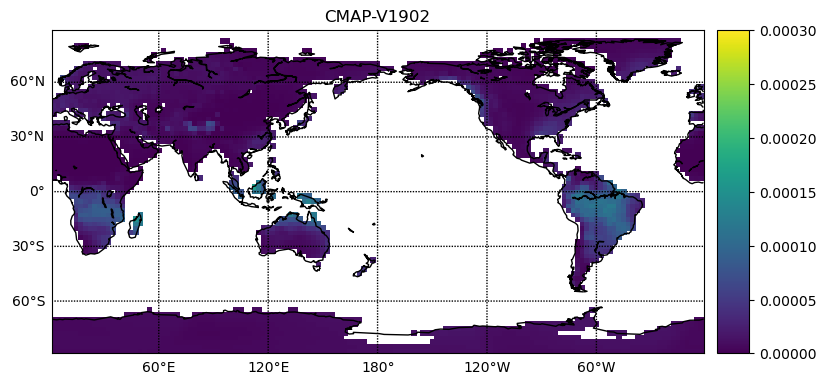

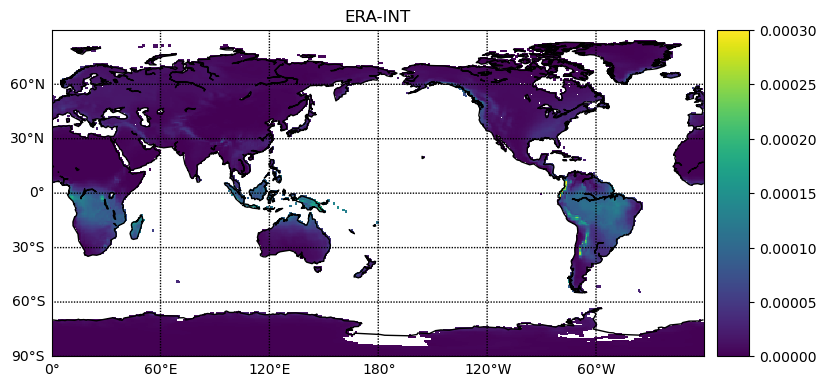

In [2]:

for i,dat in enumerate(data):    
    d = f[i][var]
    mask = cdutil.generateLandSeaMask(d[0])
    d, mask2 = genutil.grower(d, mask)
    d_ocean = MV2.masked_where(mask2==1., d)
    d_land  = MV2.masked_where(mask2==0., d)

    fig=plt.figure(figsize=(9, 6),dpi=100)
    lat  = mask2.getLatitude()[:]
    lon  = mask2.getLongitude()[:]
#     pdata = mask2[0,:,:]
#     pdata = d_ocean[0,:,:]
    pdata = d_land[0,:,:]
    x, y = np.meshgrid(lon, lat)
    m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=lat.min(), urcrnrlat=lat.max(),
            llcrnrlon=lon.min(), urcrnrlon=lon.max(), )
    m.pcolormesh(x,y,pdata,shading='flat',cmap=plt.cm.viridis, vmin=0, vmax=0.0003)
    m.colorbar(location='right')
    m.drawcoastlines()
    m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0])
    m.drawmeridians(np.arange(0.,360.,60.),labels=[0,0,0,1])
    plt.title(dat)
    plt.savefig('land.sea.maks_'+dat+'.png', bbox_inches='tight')
    

# 3. land/sea masking after regriding

/export/ahn6/anaconda3/envs/pmp_v20200601/lib/python3.8/site-packages/regrid2/horizontal.py:372: Warning: While this will work for now, please note that the Regridder class has been renamed Horizontal, the name 'Regridder' will be deprecated in future version. Please edit your code accordingly
  warnings.warn(


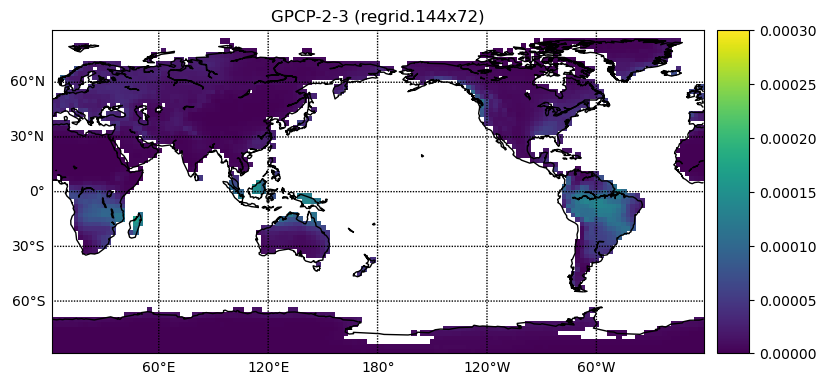

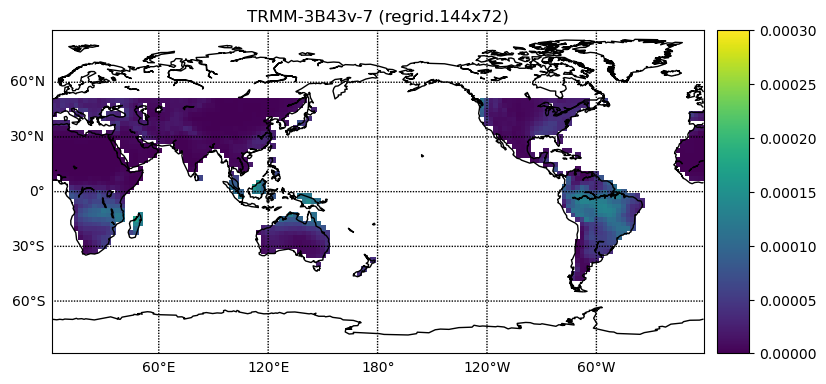

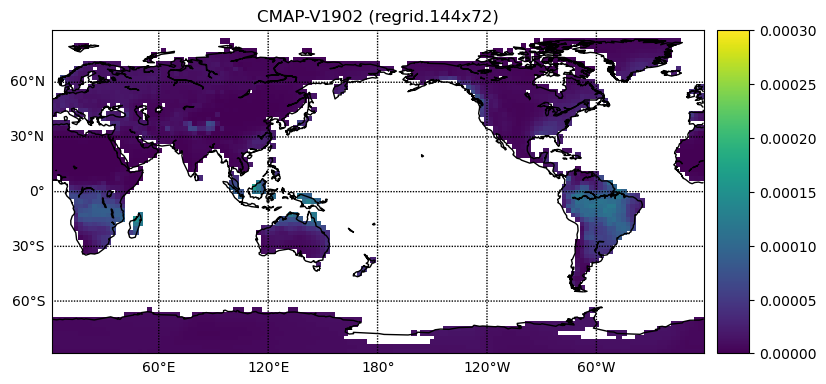

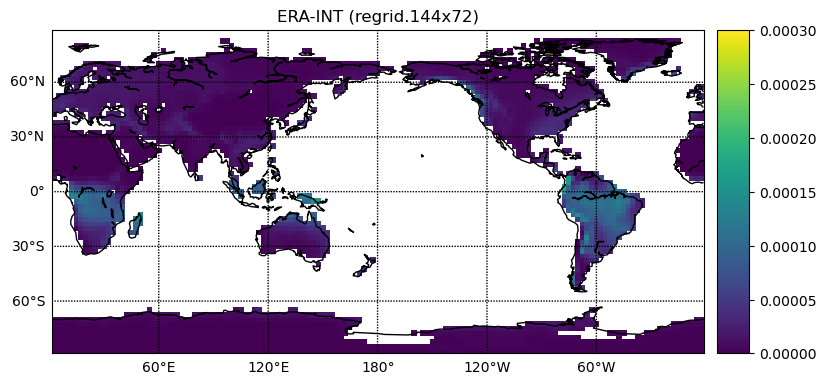

In [3]:

dt = f[0][var]
tgrid = dt.getGrid()

for i,dat in enumerate(data):
    do = f[i][var]
    orig_grid = do.getGrid()
    regridFunc = Regridder(orig_grid,tgrid)
    d = regridFunc(do)
    mask = cdutil.generateLandSeaMask(d[0])
    d, mask2 = genutil.grower(d, mask)
    d_ocean = MV2.masked_where(mask2==1., d)
    d_land  = MV2.masked_where(mask2==0., d)

    fig=plt.figure(figsize=(9, 6),dpi=100)
    lat  = mask2.getLatitude()[:]
    lon  = mask2.getLongitude()[:]
#     pdata = mask2[0,:,:]
#     pdata = d_ocean[0,:,:]
    pdata = d_land[0,:,:]
    x, y = np.meshgrid(lon, lat)
    m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=lat.min(), urcrnrlat=lat.max(),
            llcrnrlon=lon.min(), urcrnrlon=lon.max(), )
    m.pcolormesh(x,y,pdata,shading='flat',cmap=plt.cm.viridis, vmin=0, vmax=0.0003)
    m.colorbar(location='right')
    m.drawcoastlines()
    m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0])
    m.drawmeridians(np.arange(0.,360.,60.),labels=[0,0,0,1])
    plt.title(dat+' (regrid.144x72)')
    plt.savefig('land.sea.maks_'+dat+'_regrid.144x72.png', bbox_inches='tight')
    